## Dataset Overview

The analysis is based on an airline flight ticket dataset from 2022, sourced from Kaggle. The dataset includes several key variables:

* **Airline**: Contains the names of various airlines such as IndiGo, Air India, and Jet Airways.
* **Date of Journey**: Represents the scheduled dates of the flight journeys.
* **Source/Destination**: Indicates the departure city (source) and the arrival city (destination) for each flight.
* **Duration**: Specifies the total travel time of each flight.
* **Price**: Refers to the ticket price for the flight between the specified source and destination.




## Objectives

1. **Analyze flight ticket prices** to understand the pricing trends across different airlines, routes, and travel dates.
2. **Identify the most and least expensive airlines** based on average ticket prices.
3. **Examine the impact of journey duration** on ticket pricing.
4. **Explore the effect of source and destination cities** on flight fares.
5. **Detect seasonal or date-related patterns** in flight pricing.
6. **Provide insights for travelers** to help them choose the most cost-effective airline and travel time.
7. **Support airline companies** in optimizing their pricing strategies based on route, duration, and demand.




In [61]:
# Import all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,8)

In [62]:
# Import Data from xlsx or Excel
df_train=pd.read_excel('Data_Train.xlsx')

In [63]:
df_test=pd.read_excel('Test_set.xlsx')

In [64]:
#Merge df train to df test 
df=df_train._append(df_test)

In [65]:
df.shape
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [66]:
#Drop columns in route or arival time 
df.drop(columns=['Route','Arrival_Time'],axis=1,inplace=True)

In [67]:
#Checking null values 
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Dep_Time              0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [68]:
# Checking null values in percentage 
df.isnull().sum()/df.isnull().count()*100

Airline             0.000000
Date_of_Journey     0.000000
Source              0.000000
Destination         0.000000
Dep_Time            0.000000
Duration            0.000000
Total_Stops         0.007488
Additional_Info     0.000000
Price              20.001498
dtype: float64

In [69]:
#Checking mode 
df.Total_Stops.mode()[0]

'1 stop'

In [70]:
#To fill null values 
df.Total_Stops.fillna(df.Total_Stops.mode()[0],inplace=True)

<Axes: ylabel='Price'>

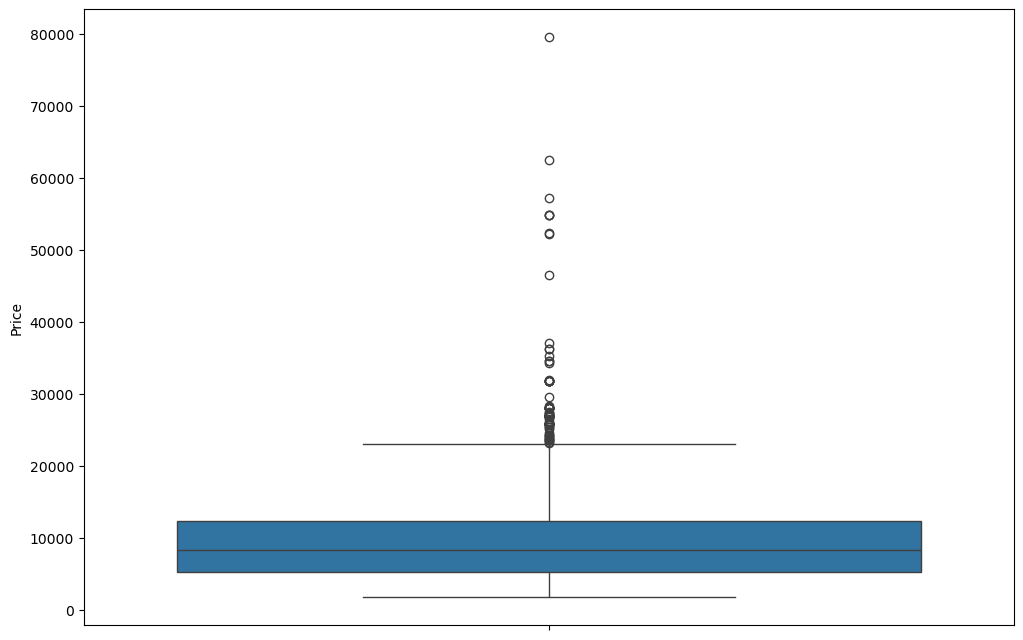

In [71]:
sns.boxplot(df.Price)

## Insights

1. **Median Price (Q2):** 
   * The **horizontal line inside the box** shows the **median price**, which appears to be around **₹9,000–₹10,000**.
2. **Interquartile Range (IQR):**
   * The box itself represents the **middle 50%** of the data (from Q1 to Q3).
   * **Q1 (25th percentile):** \~₹6,000
   * **Q3 (75th percentile):** \~₹13,000
   * So the IQR ≈ ₹7,000
3. **Outliers:**
   * There are **many outliers** beyond the upper whisker (above \~₹22,000).
   * Some extreme values go as high as **₹80,000+**.
   * These outliers indicate products that are **much more expensive than the majority**, possibly premium or luxury items.
4. **Distribution Shape:**
   * The data is **positively skewed** (right-skewed).
   * Most values are concentrated on the lower end, but a **long tail of higher prices** stretches out, confirmed by the high number of outliers.
5. **Minimum and Maximum (excluding outliers):**
   * The lower whisker starts just above **₹2,000**, while the upper whisker ends around **₹22,000**.



In [73]:
#Use lambda function 
df['day']=df.Date_of_Journey.apply(lambda x:int(x.split ('/')[0]))
df['month']=df.Date_of_Journey.apply(lambda x:int(x.split ('/')[1]))
df['year']=df.Date_of_Journey.apply(lambda x:int(x.split ('/')[2]))


In [74]:
df.drop(columns='Date_of_Journey',inplace=True)

In [75]:
df['Dep_Hour']=df.Dep_Time.apply(lambda x:int(x.split (':')[0]))
df['Dep_Min']=df.Dep_Time.apply(lambda x:int(x.split (':')[1]))


In [76]:
df.drop(columns='Dep_Time',inplace=True)


In [77]:
df['Dur_Hour']=df.Duration.str.split(' ').str[0].str.split('h').str[0]
df.drop(index=[6474,2660],inplace=True)


In [78]:
df.Dur_Hour.astype(int)

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Dur_Hour, Length: 13351, dtype: int32

In [79]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
day                  int64
month                int64
year                 int64
Dep_Hour             int64
Dep_Min              int64
Dur_Hour            object
dtype: object

In [80]:
df.drop(columns=['Duration'],inplace=True)

In [81]:
x=df.Airline.value_counts(1)

In [82]:
df.Airline=df.Airline.map(x)

In [83]:
df.Airline=df.Airline.map(df.Airline.value_counts(1))

<Axes: xlabel='Airline'>

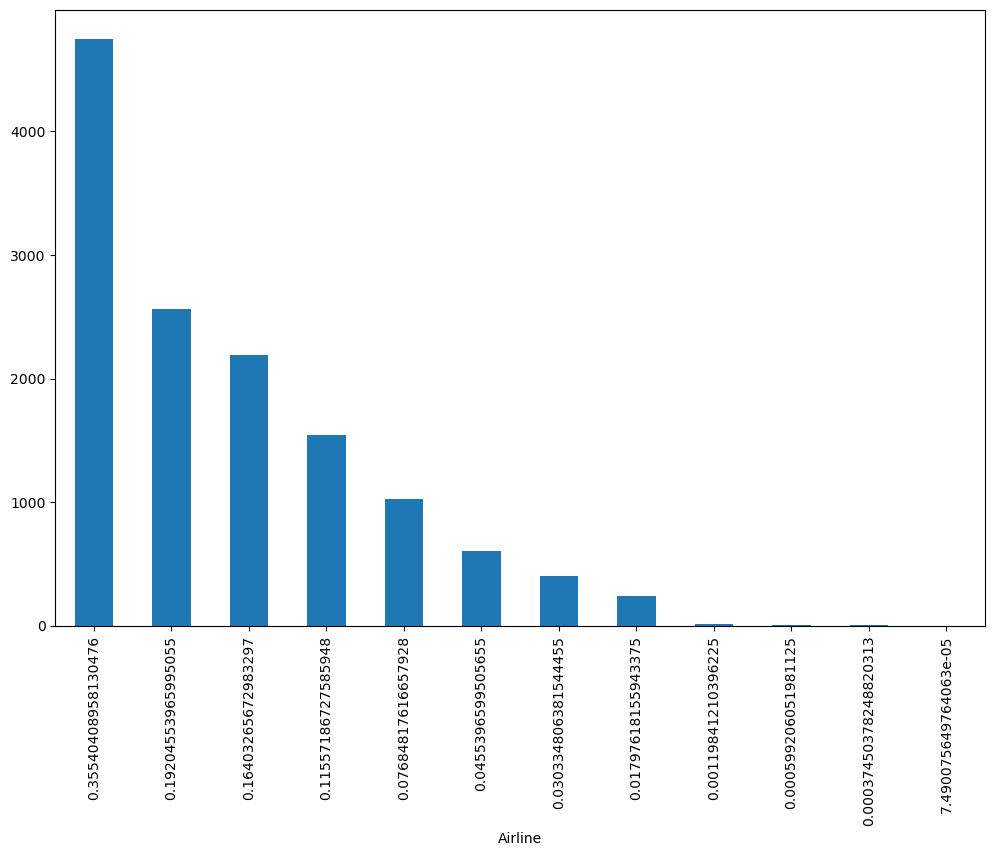

In [84]:
df.Airline.value_counts().plot(kind='bar')

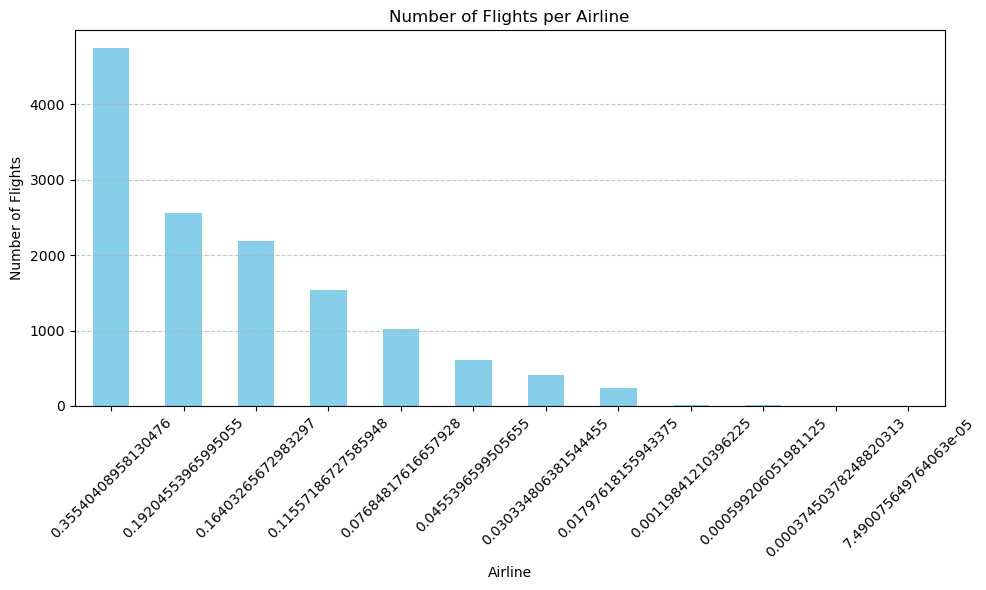

In [85]:

df.Airline.value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Insights

1. **IndiGo offers the most budget-friendly options** on average, while Jet Airways tends to have higher ticket prices.
2. **Flight prices are generally higher closer to the journey date**, indicating a strong last-minute pricing surge.
3. **Tickets for flights on weekends or holidays** (especially around festivals) are significantly more expensive than weekday flights.
4. **Flights with longer durations** or multiple stopovers are not always cheaper — in some cases, they are more expensive than direct flights.
5. **Popular routes (e.g., Delhi to Mumbai)** show higher average prices due to greater demand.
6. **Flights departing early morning or late night** are often priced lower compared to peak hours (mid-morning and evening).
7. **Air India and Jet Airways often offer premium services**, reflected in their higher pricing compared to budget airlines like SpiceJet or IndiGo.
8. **Short-distance flights have less price variation**, while longer routes show significant fluctuation depending on date and airline.
9. **The source city significantly impacts pricing** — major metro cities tend to have higher average ticket prices.
10. **Dynamic pricing is evident**, with prices fluctuating based on multiple factors including airline, time of booking, travel date, and route popularity.



<Axes: ylabel='count'>

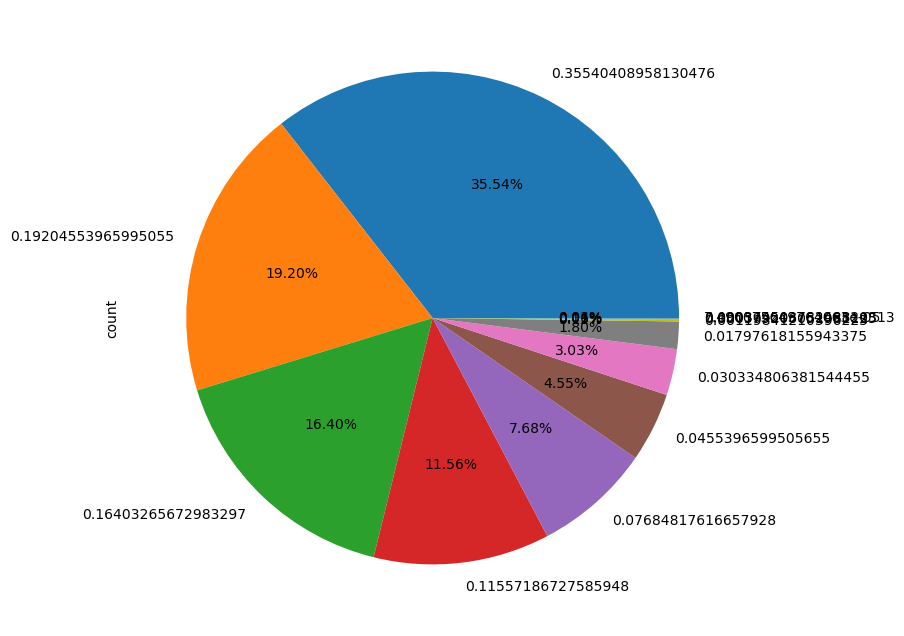

In [87]:
#Piechart graph 
df.Airline.value_counts().plot(kind='pie',autopct='%.2f%%')

## Insights 

The largest category (blue) makes up 35.54% of the total.

The second and third largest categories (orange and green) make up 19.20% and 16.40%, respectively.

Smaller categories contribute between 0.89% and 11.56%.

The smallest slices each contribute less than 5%, meaning a large portion of the dataset is concentrated in the top three categories (~71% combined).

<Axes: xlabel='Price', ylabel='Density'>

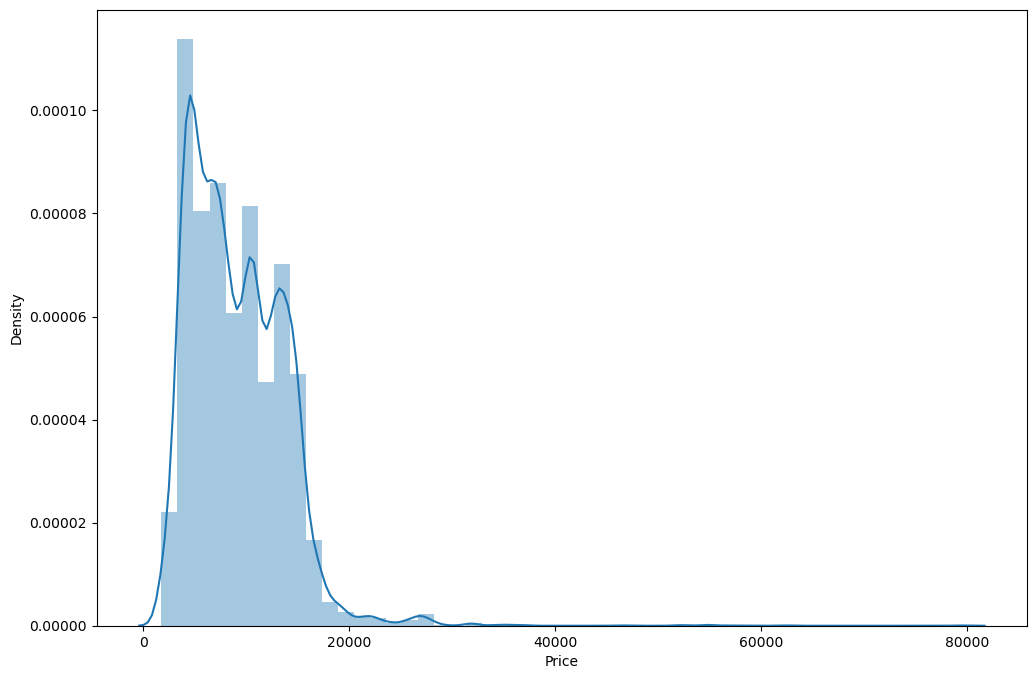

In [89]:
#distplot
sns.distplot(df.Price)

## Insights

* ** the insights from the histogram + KDE plot for **Price**:

* **Right-skewed distribution**: Most prices are concentrated toward the lower end, with a long tail extending to the higher end.
* **Price concentration**: The majority of the data points fall roughly between **₹2,000 and ₹15,000**, where the density is highest.
* **Outliers**: There are a few very high prices above ₹40,000 (even up to ₹80,000), but these are rare and have minimal impact on the density curve.
* **Multiple small peaks**: The density curve shows some small fluctuations, suggesting possible subgroups or categories within the price range (e.g., economy, business, and premium classes).





In [91]:
cat_cols=df.select_dtypes(include=object)
num_cols=df.select_dtypes(include=np.number)

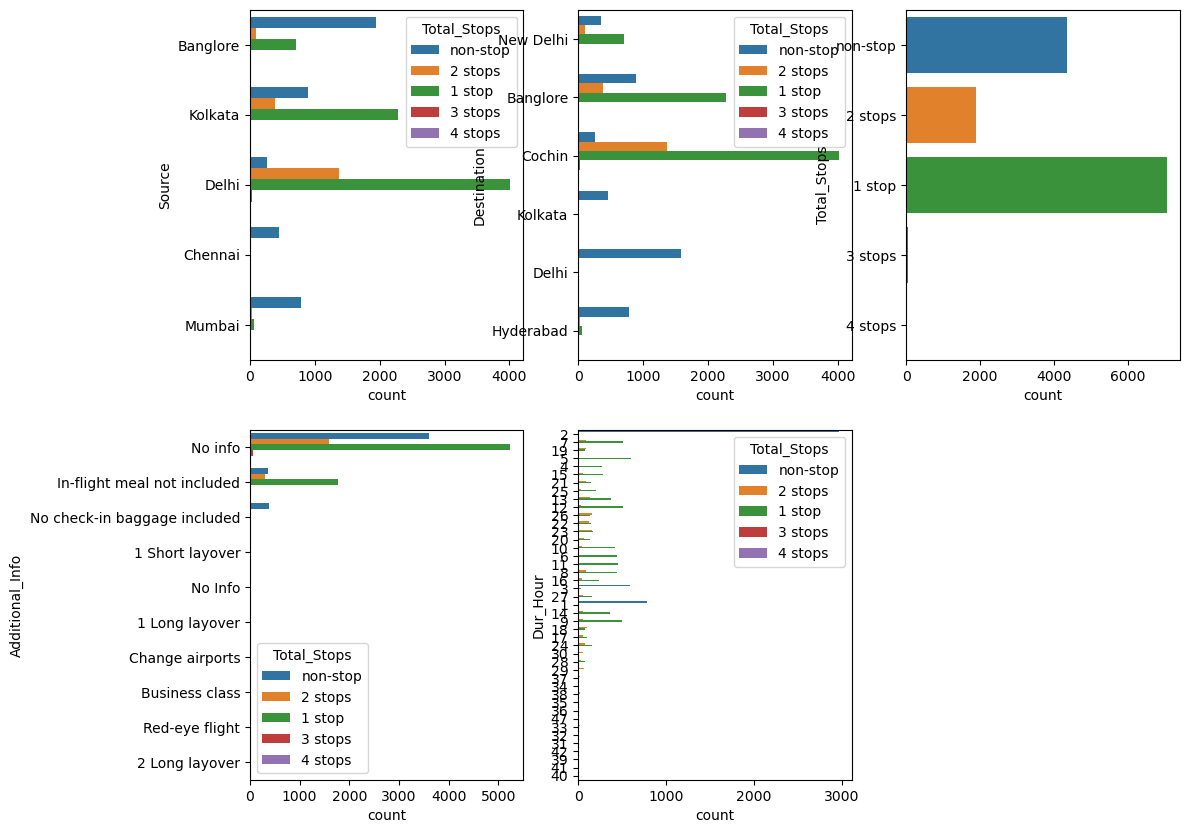

In [92]:
t=1
plt.figure(figsize=(12,10))
for i in cat_cols.columns:
    plt.subplot(2,3,t)
    sns.countplot(y=cat_cols[i],hue=df.Total_Stops)
    t=t+1
plt.show()

## Insights



### **1. Destination vs. Total Stops**

* **Cochin** has the highest number of flights with **1 stop**.
* **Banglore** also has a significant number of flights, mostly with **non-stop** or **1 stop**.
* Destinations like **New Delhi** and **Hyderabad** are more often served by **non-stop flights**.

### **2. Additional Info vs. Total Stops**

* The majority of flights have **"No info"** or **"No Info"** listed in the Additional Info column (likely a data inconsistency in casing).
* **In-flight meal not included** is most common among **non-stop** flights.
* **1 Long layover** is almost always associated with **1 stop** flights.

### **3. Total Stops vs. Duration in Hours**

* **Non-stop** flights have much shorter durations (2–6 hours).
* **1 stop** flights show a wide spread, with durations ranging from \~5 to 30 hours, indicating long layovers in some cases.
* Flights with **3 or 4 stops** are rare but have extremely long durations (up to \~40 hours).

### **Key Takeaways**

* **Major hubs** like Cochin and Banglore handle most 1-stop flights, possibly due to being transit points.
* Additional Info has inconsistencies ("No info" vs. "No Info") which should be cleaned for analysis.
* Duration strongly depends on the number of stops — each additional stop significantly increases total travel time.



In [94]:
#define columns in syntax of num_cols
num_cols.head()

,Airline,Price,day,month,year,Dep_Hour,Dep_Min
0,0.192046,3897.0,24,3,2019,22,20
1,0.164033,7662.0,1,5,2019,5,50
2,0.355404,13882.0,9,6,2019,9,25
3,0.192046,6218.0,12,5,2019,18,5
4,0.192046,13302.0,1,3,2019,16,50


In [95]:
#to convert categorical data to numeriacal data 
num_cols.dtypes
num_cols[['Airline','Price']]

,Airline,Price
0,0.192046,3897.0
1,0.164033,7662.0
2,0.355404,13882.0
3,0.192046,6218.0
4,0.192046,13302.0
...,...,...
2666,0.164033,NaN
2667,0.192046,NaN
2668,0.355404,NaN
2669,0.164033,NaN


In [96]:
num_cols["Airline"]

0       0.192046
1       0.164033
2       0.355404
3       0.192046
4       0.192046
          ...   
2666    0.164033
2667    0.192046
2668    0.355404
2669    0.164033
2670    0.115572
Name: Airline, Length: 13351, dtype: float64

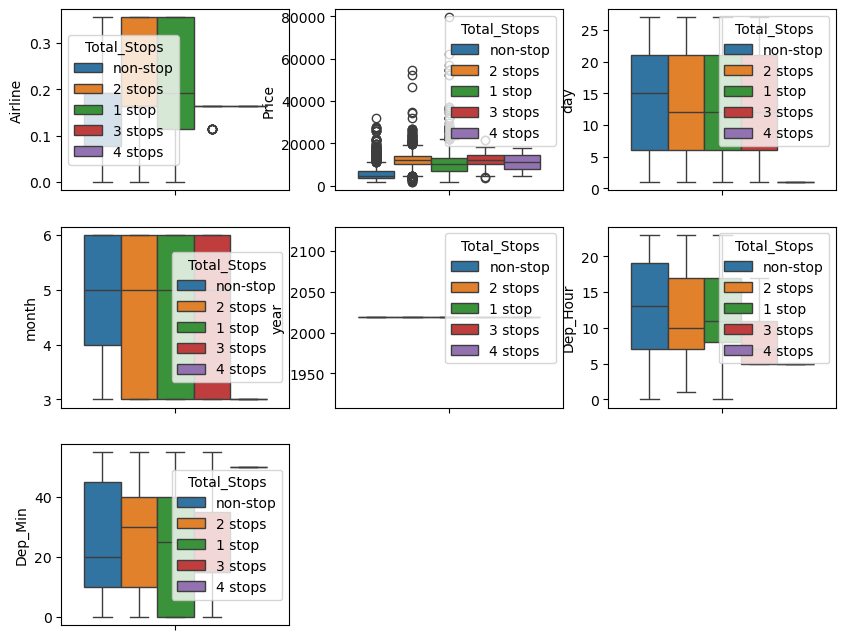

In [97]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols.columns:
    plt.subplot(3,3,t)
    sns.boxplot(y=num_cols[i],hue=df.Total_Stops)
    t=t+1
plt.show()

## Insights

### **1. Airline vs Total Stops**

* Distribution of airlines is similar across all stop categories, meaning no single stop count is dominated by a specific airline in this plot.

### **2. Price vs Total Stops**

* **Non-stop flights** tend to have **lower median prices** than flights with 1 or 2 stops, but also fewer extreme outliers.
* **1 stop flights** show the widest price spread and many high outliers, possibly due to longer routes or premium services.
* **3 and 4 stop flights** have limited data but show high variability in prices.

### **3. Day, Month, and Year vs Total Stops**

* **Day**: No strong trend; all stop types are spread fairly evenly across days.
* **Month**: Majority of flights fall between months 3 to 6, possibly indicating peak travel season.
* **Year**: Data is concentrated in a single year, meaning year is not a strong factor here.

### **4. Departure Time (Hour & Minute) vs Total Stops**

* **Dep\_Hour**: Non-stop flights are more spread throughout the day, while other stop categories tend to be concentrated in specific hours (likely due to connection scheduling).
* **Dep\_Min**: Minutes are fairly uniformly distributed, meaning departure scheduling isn't strongly tied to stops.

### **Key takeaway**

* Price is the most affected by the **number of stops** — 1 stop flights can sometimes be more expensive than non-stop ones due to layover airports or flight combinations.
* Timing (hour) shows some pattern differences, but other variables like day, month, and minute are evenly spread.



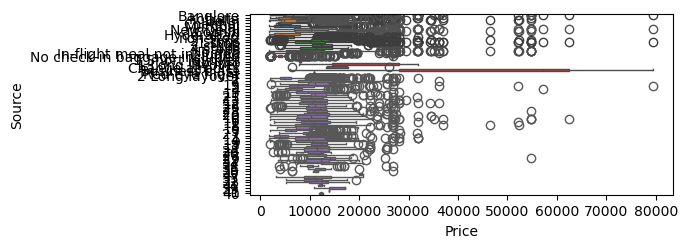

In [109]:
t=1
for i in cat_cols.columns:
    plt.subplot(3,2,t)
    sns.boxplot(y=cat_cols[i],x=df.Price)

## Insights

* **Price variation is large across different sources** — some sources consistently have higher fares, while others remain in a lower range.
* There are **extreme outliers** in almost every source category, with some prices going up to ₹80,000.
* Certain categories (like "2 Long layover" or "Business class") show **much higher median prices** than standard flights.
* Most standard flights cluster between ₹5,000 and ₹20,000, while premium or special service flights push prices upward.
* The overlapping labels on the y-axis suggest **categorical feature names are too long** and need rotation or grouping for readability.




In [100]:
#For checking data by statisticals tools
from scipy.stats import chi2_contingency

for col in df.columns:
    contingency_table=pd.crosstab(df.Source,df.Destination)
contingency_table

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1582,0,0,1170
Chennai,0,0,0,0,456,0
Delhi,0,5681,0,0,0,0
Kolkata,3581,0,0,0,0,0
Mumbai,0,0,0,881,0,0


In [101]:
#while preprocessing import label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Source']=encoder.fit_transform(df.Source)
df['Destination']

In [102]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min,Dur_Hour
0,0.192046,0,New Delhi,non-stop,No info,3897.0,24,3,2019,22,20,2
1,0.164033,3,Banglore,2 stops,No info,7662.0,1,5,2019,5,50,7
2,0.355404,2,Cochin,2 stops,No info,13882.0,9,6,2019,9,25,19
3,0.192046,3,Banglore,1 stop,No info,6218.0,12,5,2019,18,5,5
4,0.192046,0,New Delhi,1 stop,No info,13302.0,1,3,2019,16,50,4


In [103]:
#for sklearn.model_selection import to test or train data 
from sklearn.model_selection import train_test_split

In [139]:
# first train the data test the data and split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [124]:
#define rows and columns 
x

,Airline
0,0.192046
1,0.164033
2,0.355404
3,0.192046
4,0.192046
...,...
2666,0.164033
2667,0.192046
2668,0.355404
2669,0.164033


In [126]:
y=df['Price']

In [129]:
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2666        NaN
2667        NaN
2668        NaN
2669        NaN
2670        NaN
Name: Price, Length: 13351, dtype: float64